## Loading The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

## Importing The Datasets

In [2]:
df_train = pd.read_csv("train.csv", low_memory = False)
df_test = pd.read_csv("test.csv", low_memory = False)
df_store = pd.read_csv("store.csv", low_memory = False)

### Assessing the 'train.csv' dataset

In [3]:
df_train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [4]:
df_train.shape

(1017209, 9)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are 1017209 rows with 9 features in the "train.csv" dataset, where 2 features are categorical (Date & StateHoliday) while the rest are numerical and contains the following fields:

- Store: a unique Id for each store
- Sales: the turnover for any given day (target variable).
- Customers: the number of customers on a given day.
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. All schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

### Checking for missing values

<AxesSubplot:>

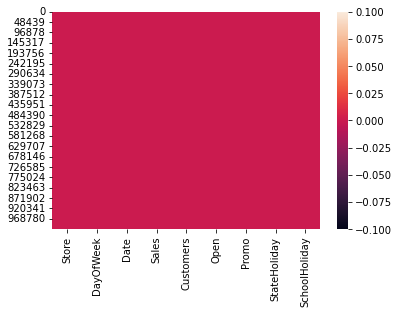

In [6]:
sns.heatmap(df_train.isnull())

In [7]:
df_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Checking for duplicates

In [8]:
df_train.duplicated(subset=['Store', 'Date']).value_counts()

False    1017209
dtype: int64

### Assessing the 'store.csv' dataset

In [15]:
df_store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [16]:
df_store.shape

(1115, 10)

In [17]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows with 10 features in the "store.csv" dataset, where 3 features are categorical (StoreType, Assortment & PromoInterval) while the rest are numerical and contains the following fields:

- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Checking for missing values

<AxesSubplot:>

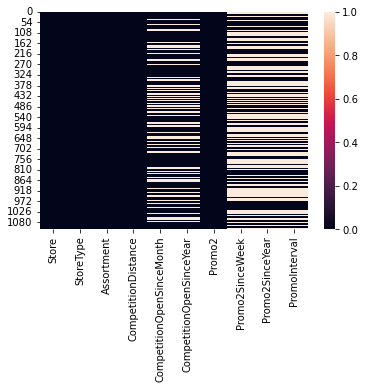

In [18]:
sns.heatmap(df_store.isnull())

In [19]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
#Dropping the columns with many NaN values
df_store.drop(['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1, inplace=True)

### Merging the datasets

In [21]:
df_merge = pd.merge(df_train, df_store, how = 'left', on = 'Store')

In [22]:
df_merge.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,0


In [23]:
df_merge.shape

(1017209, 12)

### Checking for missing values

<AxesSubplot:>

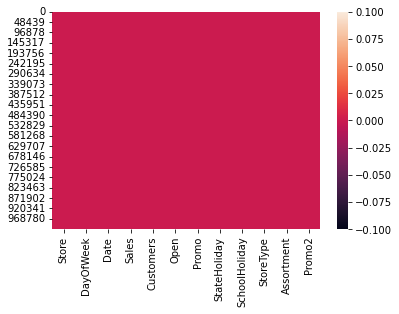

In [24]:
sns.heatmap(df_merge.isnull())

In [25]:
df_merge.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
StoreType        0
Assortment       0
Promo2           0
dtype: int64

In [26]:
#Checking for duplicates after merging
df_merge.duplicated(subset=['Store', 'Date']).value_counts()

False    1017209
dtype: int64

### Splitting the 'Date' column into 'Year', 'Month' & 'Day'

In [27]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])
df_merge['Year'] = df_merge.Date.dt.year
df_merge['Month'] = df_merge.Date.dt.month
#df_merge['Month'] = df_merge['Month'].apply(lambda x: calendar.month_abbr[x])
df_merge['Day'] = df_merge.Date.dt.day
#df_merge['WeekOfYear'] = df_merge.Date.dt.isocalendar().week

In [28]:
df_merge.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,0,2015,7,31
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,0,2015,7,31
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,0,2015,7,31
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,0,2015,7,31
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,0,2015,7,31
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,0,2015,7,31


In [29]:
df_merge['Month'] = df_merge['Month'].astype(str).str.zfill(2)
df_merge['Months'] = df_merge['Year'].astype(str) + " - " + df_merge['Month'].astype(str)
df_merge.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day,Months
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,0,2015,07,31,2015 - 07
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,1,2015,07,31,2015 - 07
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,1,2015,07,31,2015 - 07
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,0,2015,07,31,2015 - 07
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,0,2015,07,31,2015 - 07
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,0,2015,07,31,2015 - 07
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,0,2015,07,31,2015 - 07
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,0,2015,07,31,2015 - 07
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,0,2015,07,31,2015 - 07
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,0,2015,07,31,2015 - 07


### Correlation Heatmap

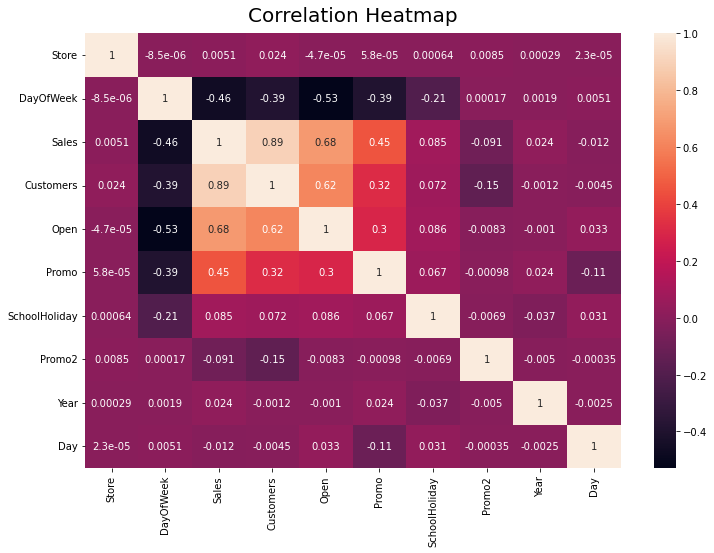

In [30]:
def heatmap_all(combined):
    plt.figure(figsize=(12, 8))
    heatmap = sns.heatmap(combined.corr(), annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
heatmap_all(df_merge)

### Data Visualization

In [31]:
#Year-Sales
Sales_Year = df_merge.groupby(['Year'])[['Sales']].sum()
Sales_Year

,Sales
Year,
2013,2302876084
2014,2180804896
2015,1389499643


In [32]:
Sales_Year = Sales_Year.reset_index(level=0)

Text(0, 0.5, 'Number of Sales')

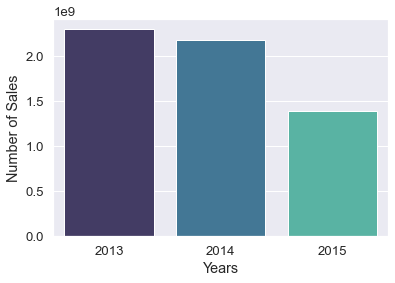

In [33]:
sns.set(rc = {'figure.figsize':(6,4)}, font_scale = 1.2)
sns.barplot(x='Year', y='Sales', data=Sales_Year, palette="mako")
plt.xlabel("Years")
plt.ylabel("Number of Sales")

In [37]:
#Months-Sales
Sales_YearMonth = df_merge.groupby(['Months'])[['Sales', 'Customers']].sum()
Sales_YearMonth.sort_values('Months')

,Sales,Customers
Months,,
2013 - 01,180132207,20380423
2013 - 02,171534275,19244468
2013 - 03,201180369,21969462
2013 - 04,183431432,20882365
2013 - 05,185411063,20723886
2013 - 06,180702351,20473046
2013 - 07,208843882,22872045
2013 - 08,198042727,22314232
2013 - 09,178053963,20350031


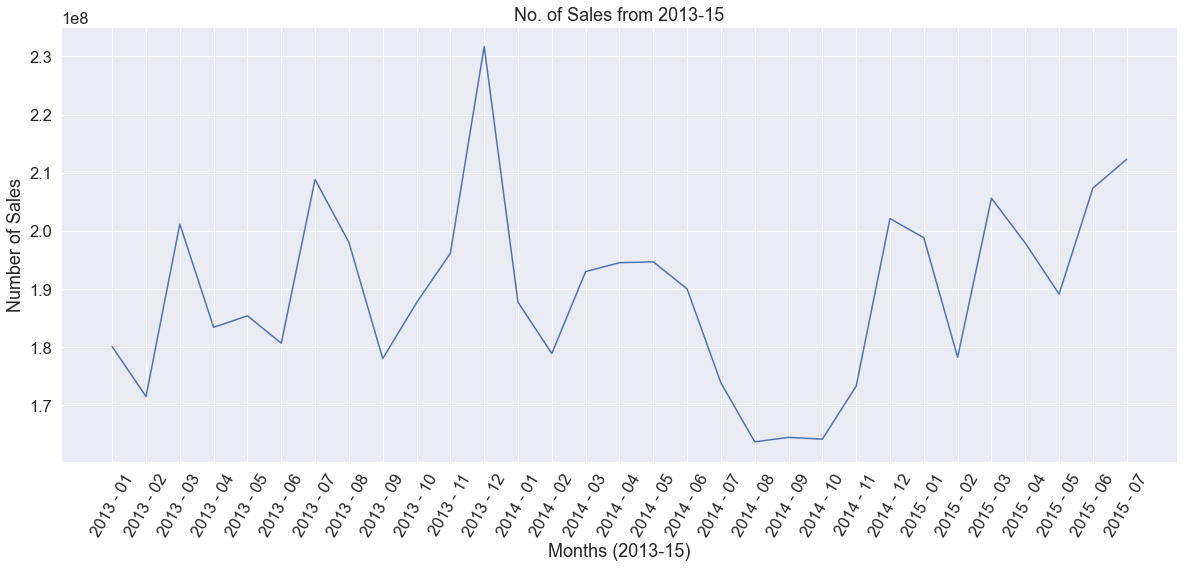

In [38]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Sales_YearMonth, x="Months", y="Sales").set(title="No. of Sales from 2013-15")
plt.xticks(rotation=60)
plt.xlabel("Months (2013-15)")
plt.ylabel("Number of Sales")
plt.show()

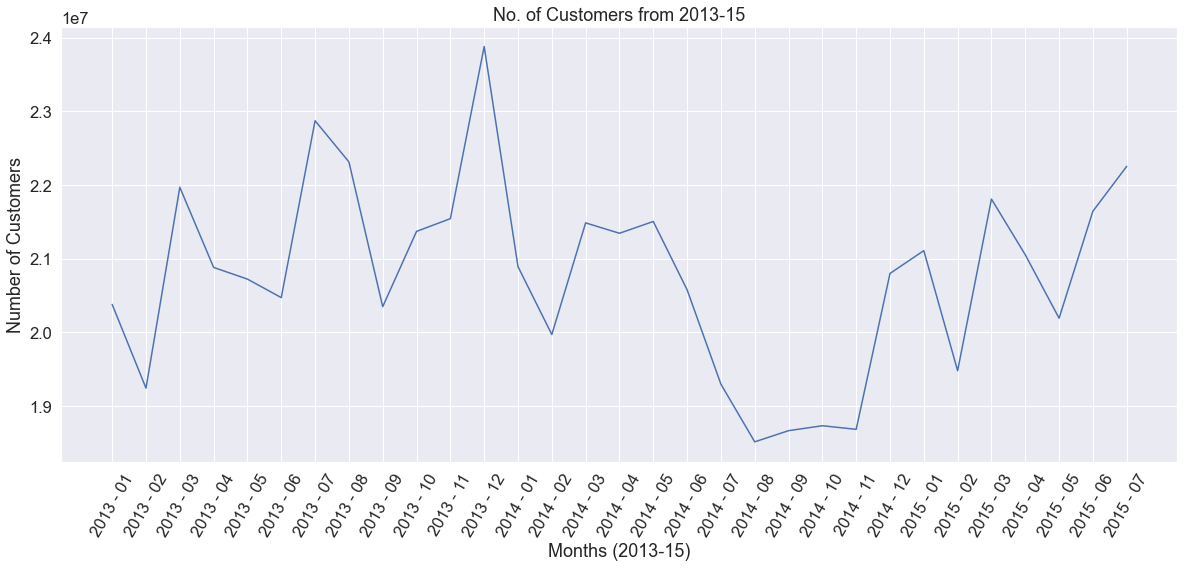

In [39]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Sales_YearMonth, x="Months", y="Customers").set(title="No. of Customers from 2013-15")
plt.xticks(rotation=60)
plt.xlabel("Months (2013-15)")
plt.ylabel("Number of Customers")
plt.show()

In [40]:
#Months-Open
Open_YearMonth = df_merge.groupby(['Months'])[['Open']].sum()
Open_YearMonth.sort_values('Months')

,Open
Months,
2013 - 01,28869
2013 - 02,26683
2013 - 03,27892
2013 - 04,27880
2013 - 05,26202
2013 - 06,27942
2013 - 07,30166
2013 - 08,30025
2013 - 09,27981


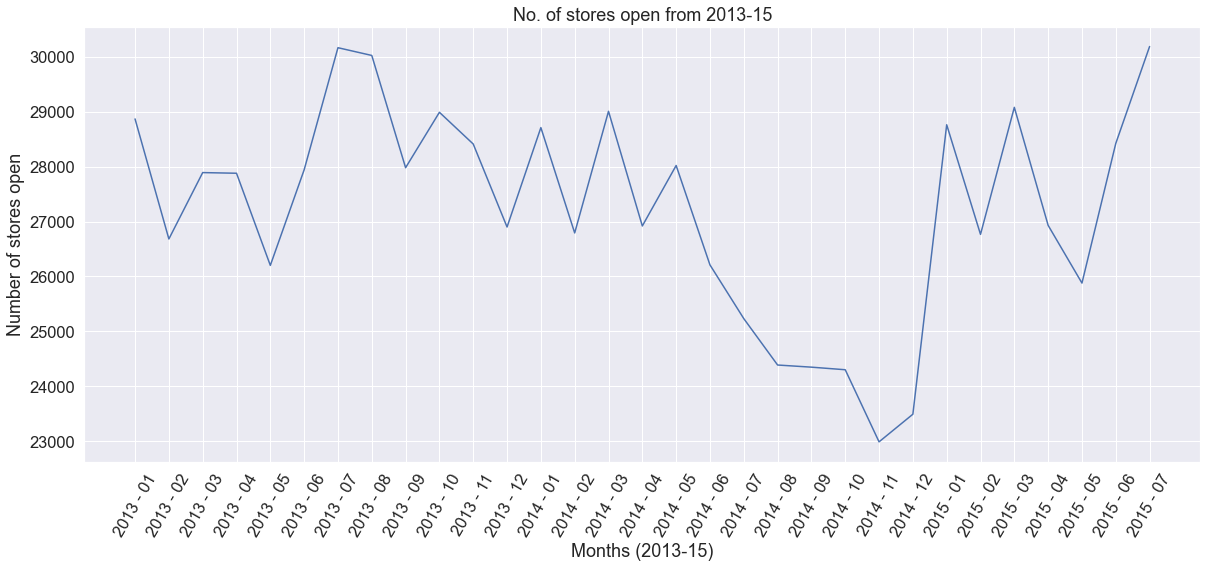

In [41]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Open_YearMonth, x="Months", y="Open").set(title="No. of stores open from 2013-15")
plt.xticks(rotation=60)
plt.xlabel("Months (2013-15)")
plt.ylabel("Number of stores open")
plt.show()

In [185]:
#Store_Types-Monthly_Sales
Type_YearMonth = df_merge.groupby(['Months', 'StoreType'])[['Sales']].sum()
Type_YearMonth.sort_values('Months')

Sales
Months    StoreType           
2013 - 01 a           98821318
          b            4124131
          c           23705553
          d           53481205
2013 - 02 a           93685217
...                        ...
2015 - 06 d           64263846
2015 - 07 a          112489626
          b            5731086
          c           27832341
          d           66269563

[124 rows x 1 columns]

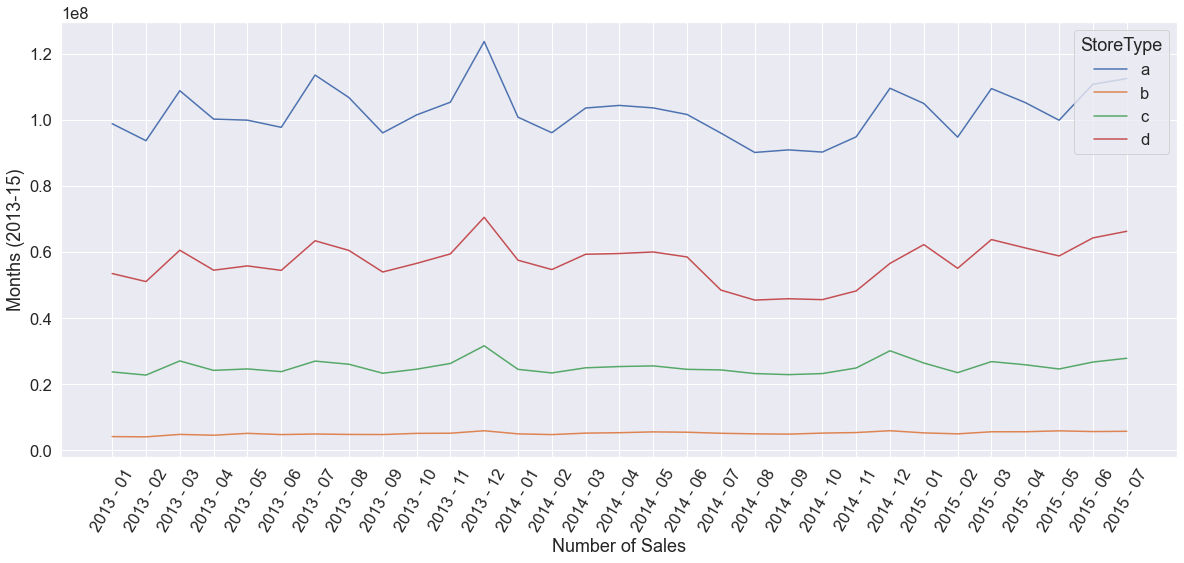

In [186]:
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=Type_YearMonth, x="Months", y="Sales", hue="StoreType")
plt.xticks(rotation=60)
plt.xlabel("Number of Sales")
plt.ylabel("Months (2013-15)")
plt.show()

Text(0, 0.5, 'Store Count')

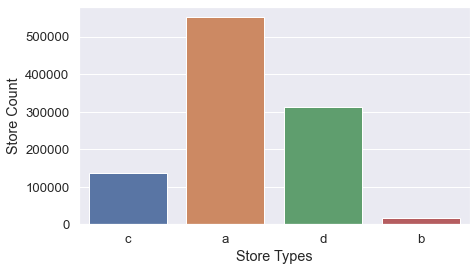

In [42]:
#Store_Type Count
sns.set(rc = {'figure.figsize':(7,4)}, font_scale = 1.2)
sns.countplot(x="StoreType", data=df_merge)
plt.xlabel("Store Types")
plt.ylabel("Store Count")

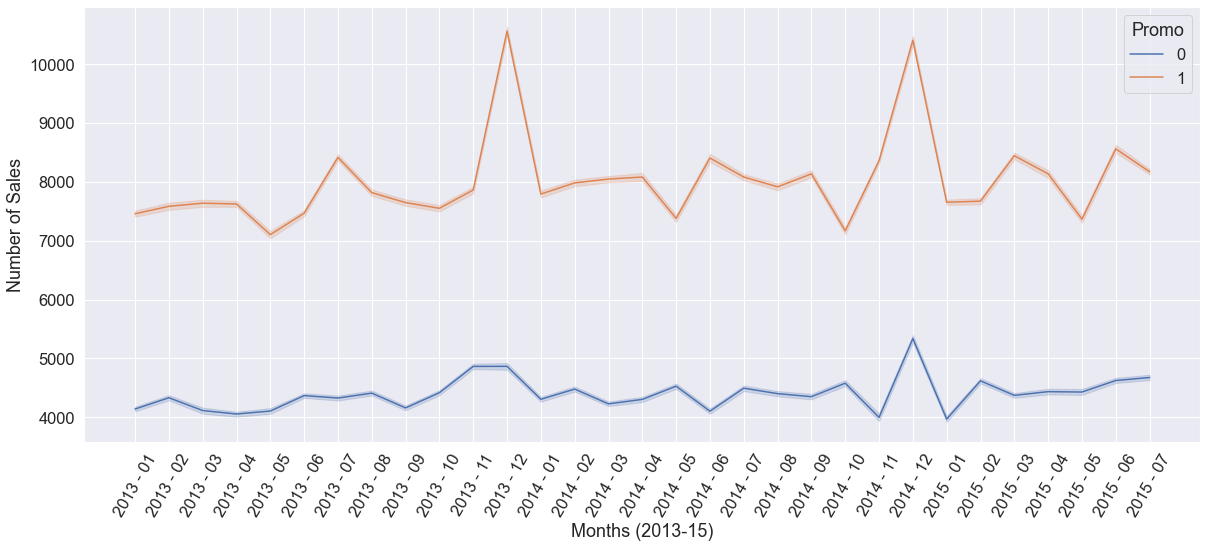

In [44]:
#Months-Promo
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
df_promo = df_merge.sort_values("Months")
sns.lineplot(data=df_promo, x="Months", y="Sales", hue="Promo")
plt.xticks(rotation=60)
plt.xlabel("Months (2013-15)")
plt.ylabel("Number of Sales")
plt.show()

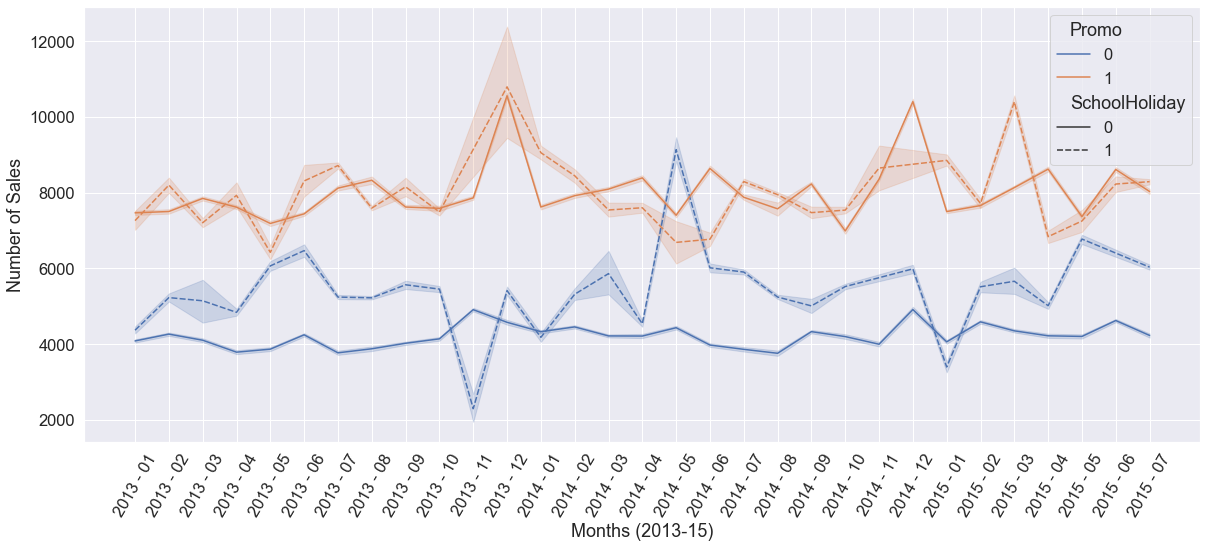

In [45]:
#Promo-SchoolHoliday
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=df_promo, x="Months", y="Sales", hue="Promo", style='SchoolHoliday')
plt.xticks(rotation=60)
plt.xlabel("Months (2013-15)")
plt.ylabel("Number of Sales")
plt.show()

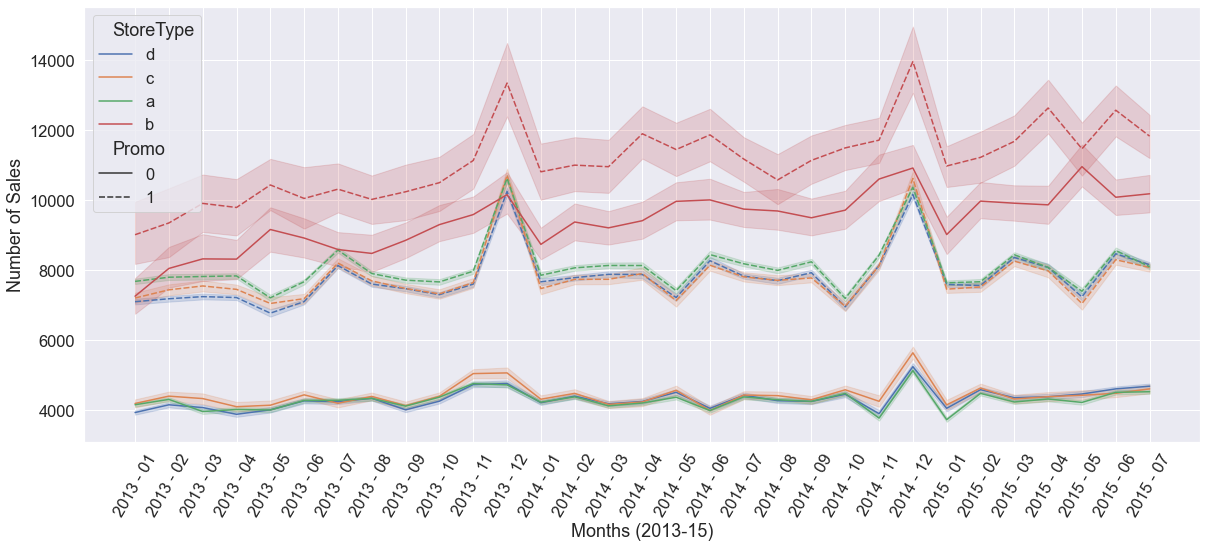

In [46]:
#Sales-StoreType
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.5)
sns.lineplot(data=df_promo, x="Months", y="Sales", hue="StoreType", style='Promo')
plt.xticks(rotation=60)
plt.xlabel("Months (2013-15)")
plt.ylabel("Number of Sales")
plt.show()

### Encoding the Categorical Variables

In [54]:
#Creating a dummy dataset and dropping 'Date' column
df_model = df_merge.copy()
df_model.drop(['Date'], axis=1, inplace=True)

In [55]:
df_model.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day,Months
0,1,5,5263,555,1,1,0,1,c,a,0,2015,07,31,2015 - 07
1,2,5,6064,625,1,1,0,1,a,a,1,2015,07,31,2015 - 07
2,3,5,8314,821,1,1,0,1,a,a,1,2015,07,31,2015 - 07
3,4,5,13995,1498,1,1,0,1,c,c,0,2015,07,31,2015 - 07
4,5,5,4822,559,1,1,0,1,a,a,0,2015,07,31,2015 - 07
5,6,5,5651,589,1,1,0,1,a,a,0,2015,07,31,2015 - 07
6,7,5,15344,1414,1,1,0,1,a,c,0,2015,07,31,2015 - 07
7,8,5,8492,833,1,1,0,1,a,a,0,2015,07,31,2015 - 07
8,9,5,8565,687,1,1,0,1,a,c,0,2015,07,31,2015 - 07
9,10,5,7185,681,1,1,0,1,a,a,0,2015,07,31,2015 - 07


### One-Hot Encoding

In [107]:
cat_cols = df_model[['StoreType', 'Assortment']] 

In [108]:
from sklearn.preprocessing import OneHotEncoder
#One-hot-encoding the categorical columns.
encoder = OneHotEncoder(handle_unknown='ignore')
#Converting it to dataframe
df_encoder = pd.DataFrame(encoder.fit_transform(cat_cols).toarray())
df_final = df_model.join(df_encoder)
df_final.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Month,Day,Months,0,1,2,3,4,5,6
0,1,5,5263,555,1,1,0,1,c,a,...,07,31,2015 - 07,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,5,6064,625,1,1,0,1,a,a,...,07,31,2015 - 07,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,5,8314,821,1,1,0,1,a,a,...,07,31,2015 - 07,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5,13995,1498,1,1,0,1,c,c,...,07,31,2015 - 07,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,5,4822,559,1,1,0,1,a,a,...,07,31,2015 - 07,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [109]:
#Dropping the columns that have already been One-Hot-Encoded
df_final.drop(['StateHoliday', 'StoreType', 'Assortment', 'Months', 'Customers'], axis=1, inplace=True)

In [110]:
col = df_final.pop('Sales')
df_final.insert(0, 'Sales', col)
df_final.head()

,Sales,Store,DayOfWeek,Open,Promo,SchoolHoliday,Promo2,Year,Month,Day,0,1,2,3,4,5,6
0,5263,1,5,1,1,1,0,2015,07,31,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,6064,2,5,1,1,1,1,2015,07,31,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8314,3,5,1,1,1,1,2015,07,31,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13995,4,5,1,1,1,0,2015,07,31,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4822,5,5,1,1,1,0,2015,07,31,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
X = df_final.iloc[:, 1:].values
y = df_final.iloc[:, 0].values

In [112]:
X

array([[1, 5, 1, ..., 1.0, 0.0, 0.0],
       [2, 5, 1, ..., 1.0, 0.0, 0.0],
       [3, 5, 1, ..., 1.0, 0.0, 0.0],
       ...,
       [1113, 2, 0, ..., 0.0, 0.0, 1.0],
       [1114, 2, 0, ..., 0.0, 0.0, 1.0],
       [1115, 2, 0, ..., 0.0, 0.0, 1.0]], dtype=object)

In [113]:
y

array([5263, 6064, 8314, ...,    0,    0,    0])

### Splitting the dataset

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [115]:
X_train

array([[81, 5, 1, ..., 1.0, 0.0, 0.0],
       [683, 2, 1, ..., 1.0, 0.0, 0.0],
       [282, 3, 1, ..., 1.0, 0.0, 0.0],
       ...,
       [65, 1, 1, ..., 0.0, 0.0, 1.0],
       [826, 4, 1, ..., 0.0, 0.0, 1.0],
       [928, 3, 1, ..., 0.0, 0.0, 1.0]], dtype=object)

In [116]:
X_test

array([[963, 2, 1, ..., 0.0, 0.0, 1.0],
       [859, 2, 1, ..., 1.0, 0.0, 0.0],
       [534, 4, 1, ..., 1.0, 0.0, 0.0],
       ...,
       [639, 7, 0, ..., 1.0, 0.0, 0.0],
       [681, 2, 1, ..., 0.0, 0.0, 1.0],
       [344, 2, 1, ..., 0.0, 0.0, 1.0]], dtype=object)

In [117]:
y_train

array([ 6786, 13290,  5024, ...,  7433, 11957,  5961])

In [118]:
y_test

array([ 9609,  6670,  4967, ...,     0,  1961, 12052])

### Random Forest Regression Model

In [119]:
#Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting the Test set results

In [120]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
pred = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
pred[:10, :]

array([[8401.7, 9609. ],
       [6590.9, 6670. ],
       [5236.7, 4967. ],
       [8219.2, 8301. ],
       [9253.7, 8889. ],
       [5557.8, 6387. ],
       [4336.8, 4196. ],
       [   0. ,    0. ],
       [7461.8, 7461. ],
       [   0. ,    0. ]])

In [121]:
pred_plot = pd.DataFrame(pred, columns=['Predicted', 'Actual'])
pred_plot.head(15)

,Predicted,Actual
0,8401.7,9609.0
1,6590.9,6670.0
2,5236.7,4967.0
3,8219.2,8301.0
4,9253.7,8889.0
5,5557.8,6387.0
6,4336.8,4196.0
7,0.0,0.0
8,7461.8,7461.0
9,0.0,0.0


### Evaluating the model performance

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9265484373523981

In [123]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

577.8517184258905

In [124]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1094347.204999803

### LightGBM Regression Model

In [125]:
#Training the LightGBM model on the whole dataset
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

### Evaluating the model performance

In [126]:
#R-Squared
from sklearn import metrics
r2_score(expected_y, predicted_y)

0.7554204692564416

In [127]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expected_y, predicted_y)

1323.5863531255904

In [128]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(expected_y, predicted_y)

3643965.032486824

### Assessing the 'test.csv' dataset

In [129]:
df_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [130]:
df_test.shape

(41088, 8)

In [131]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


There are 41088 rows with 8 features in the "test.csv" dataset, where 2 features are categorical (Date & StateHoliday) while the rest are numerical and contains the following fields:

- Id: an Id that represents a (Store, Date) duple within the test set
- Store: a unique Id for each store
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. All schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

### Merging the 'test.csv' dataset with 'stores.csv' dataset

In [132]:
df_result = pd.merge(df_test, df_store, how = 'left', on = 'Store')

In [133]:
df_result.shape

(41088, 11)

### Checking for missing values

<AxesSubplot:>

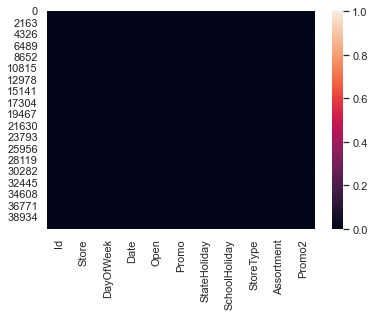

In [134]:
sns.set(rc = {'figure.figsize':(6,4)}, font_scale = 1)
sns.heatmap(df_result.isnull())

In [135]:
df_result.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
StoreType         0
Assortment        0
Promo2            0
dtype: int64

In [136]:
# Replacing missing values in 'Open' column with '1.0'
df_result['Open'] = df_result['Open'].fillna(1.0)

### Splitting the 'Date' column into 'Year', 'Month' & 'Day'

In [137]:
df_result['Date'] = pd.to_datetime(df_result['Date'])
df_result['Year'] = df_result.Date.dt.year
df_result['Month'] = df_result.Date.dt.month
df_result['Day'] = df_result.Date.dt.day

In [138]:
df_result.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,0,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,1,2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,0,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,0,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,0,2015,9,17
5,6,10,4,2015-09-17,1.0,1,0,0,a,a,0,2015,9,17
6,7,11,4,2015-09-17,1.0,1,0,0,a,c,1,2015,9,17
7,8,12,4,2015-09-17,1.0,1,0,0,a,c,1,2015,9,17
8,9,13,4,2015-09-17,1.0,1,0,0,d,a,1,2015,9,17
9,10,14,4,2015-09-17,1.0,1,0,0,a,a,1,2015,9,17


### Encoding the Categorical Columns for 'test.csv'

In [139]:
# Dropping the 'Date' column
df_result.drop('Date', axis=1, inplace=True)

### One-Hot Encoding

In [140]:
res_cols = df_result[['StoreType', 'Assortment']] 

In [141]:
from sklearn.preprocessing import OneHotEncoder
#One-hot-encoding the categorical columns.
encoder = OneHotEncoder(handle_unknown='ignore')
#Converting it to dataframe
df_encoder = pd.DataFrame(encoder.fit_transform(res_cols).toarray())
df_res_final = df_result.join(df_encoder)
df_res_final.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day,0,1,2,3,4,5,6
0,1,1,4,1.0,1,0,0,c,a,0,2015,9,17,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,3,4,1.0,1,0,0,a,a,1,2015,9,17,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,7,4,1.0,1,0,0,a,c,0,2015,9,17,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,8,4,1.0,1,0,0,a,a,0,2015,9,17,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,9,4,1.0,1,0,0,a,c,0,2015,9,17,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [142]:
#Dropping the columns that have already been One-Hot-Encoded
df_res_final.drop(['StateHoliday', 'StoreType', 'Assortment', 'Id'], axis=1, inplace=True)

### Predicted Sales

In [143]:
#Predicted Sales for the test set
predicted_test = regressor.predict(df_res_final)

In [144]:
predicted_test

array([ 4491.7,  7344.6,  9468.9, ...,  6897.8, 28684.4,  8707.8])

In [145]:
pred_sales = pd.DataFrame(predicted_test, columns=['Predicted_Sales'])

In [146]:
df_graph = pred_sales.copy()

In [147]:
df_graph.head(10)

,Predicted_Sales
0,4491.7
1,7344.6
2,9468.9
3,7481.4
4,7027.6
5,5958.2
6,7969.7
7,8314.1
8,6185.6
9,5670.8


### Visualization of the Predicted Values

In [156]:
df_graph["Year"] = df_result["Year"]
df_graph["Month"] = df_result["Month"]
df_graph["Day"] = df_result["Day"]

In [157]:
df_graph['Day'] = df_graph['Day'].astype(str).str.zfill(2)
df_graph['Month-Day'] = df_graph['Month'].astype(str) + "-" + df_graph['Day'].astype(str)

In [158]:
df_graph.drop(["Month", "Day"], axis=1, inplace=True)

In [159]:
df_graph.head(10)

,Predicted_Sales,Year,Month-Day
0,4491.7,2015,9-17
1,7344.6,2015,9-17
2,9468.9,2015,9-17
3,7481.4,2015,9-17
4,7027.6,2015,9-17
5,5958.2,2015,9-17
6,7969.7,2015,9-17
7,8314.1,2015,9-17
8,6185.6,2015,9-17
9,5670.8,2015,9-17


In [160]:
Predict_Month = df_graph.groupby(['Month-Day'])[['Predicted_Sales']].sum()
Predict_Month

,Predicted_Sales
Month-Day,
8-01,5860618.3
8-02,231011.0
8-03,8450775.9
8-04,6984534.3
8-05,6552662.8
8-06,6407508.8
8-07,6411874.9
8-08,5013201.3
8-09,222333.6


In [161]:
Predict_Month['Predicted_Sales'] = Predict_Month['Predicted_Sales'].astype('int')
Predict_Month

,Predicted_Sales
Month-Day,
8-01,5860618
8-02,231011
8-03,8450775
8-04,6984534
8-05,6552662
8-06,6407508
8-07,6411874
8-08,5013201
8-09,222333


In [162]:
start_date = '2013-08-01'
end_date = '2013-09-17'

In [163]:
mask_13 = (df_merge['Date'] >= start_date) & (df_merge['Date'] <= end_date)

In [164]:
df_13 = df_merge.loc[mask_13]
df_13.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day,Months
727310,1,2,2013-09-17,3685,502,1,0,0,0,c,a,0,2013,09,17,2013 - 09
727311,2,2,2013-09-17,3823,525,1,0,0,0,a,a,1,2013,09,17,2013 - 09
727312,3,2,2013-09-17,5517,725,1,0,0,0,a,a,1,2013,09,17,2013 - 09
727313,4,2,2013-09-17,7248,1073,1,0,0,0,c,c,0,2013,09,17,2013 - 09
727314,5,2,2013-09-17,3846,528,1,0,0,0,a,a,0,2013,09,17,2013 - 09
727315,6,2,2013-09-17,5448,742,1,0,0,0,a,a,0,2013,09,17,2013 - 09
727316,7,2,2013-09-17,7767,985,1,0,0,0,a,c,0,2013,09,17,2013 - 09
727317,8,2,2013-09-17,4473,636,1,0,0,0,a,a,0,2013,09,17,2013 - 09
727318,9,2,2013-09-17,4830,469,1,0,0,0,a,c,0,2013,09,17,2013 - 09
727319,10,2,2013-09-17,4394,543,1,0,0,0,a,a,0,2013,09,17,2013 - 09


In [165]:
df_13['Date'] = pd.to_datetime(df_13['Date'])
df_13['Year'] = df_13.Date.dt.year
df_13['Month'] = df_13.Date.dt.month
df_13['Day'] = df_13.Date.dt.day

/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/3237632102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13['Date'] = pd.to_datetime(df_13['Date'])
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/3237632102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13['Year'] = df_13.Date.dt.year
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/3237632102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [166]:
df_13['Day'] = df_13['Day'].astype(str).str.zfill(2)
df_13['Month-Day'] = df_13['Month'].astype(str) + "-" + df_13['Day'].astype(str)

/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/1382456596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13['Day'] = df_13['Day'].astype(str).str.zfill(2)
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/1382456596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13['Month-Day'] = df_13['Month'].astype(str) + "-" + df_13['Day'].astype(str)


In [167]:
df_13.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day,Months,Month-Day
727310,1,2,2013-09-17,3685,502,1,0,0,0,c,a,0,2013,9,17,2013 - 09,9-17
727311,2,2,2013-09-17,3823,525,1,0,0,0,a,a,1,2013,9,17,2013 - 09,9-17
727312,3,2,2013-09-17,5517,725,1,0,0,0,a,a,1,2013,9,17,2013 - 09,9-17
727313,4,2,2013-09-17,7248,1073,1,0,0,0,c,c,0,2013,9,17,2013 - 09,9-17
727314,5,2,2013-09-17,3846,528,1,0,0,0,a,a,0,2013,9,17,2013 - 09,9-17
727315,6,2,2013-09-17,5448,742,1,0,0,0,a,a,0,2013,9,17,2013 - 09,9-17
727316,7,2,2013-09-17,7767,985,1,0,0,0,a,c,0,2013,9,17,2013 - 09,9-17
727317,8,2,2013-09-17,4473,636,1,0,0,0,a,a,0,2013,9,17,2013 - 09,9-17
727318,9,2,2013-09-17,4830,469,1,0,0,0,a,c,0,2013,9,17,2013 - 09,9-17
727319,10,2,2013-09-17,4394,543,1,0,0,0,a,a,0,2013,9,17,2013 - 09,9-17


In [168]:
start_date = '2014-08-01'
end_date = '2014-09-17'

In [169]:
mask_14 = (df_merge['Date'] >= start_date) & (df_merge['Date'] <= end_date)

In [170]:
df_14 = df_merge.loc[mask_14]
df_14.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,Promo2,Year,Month,Day,Months
334555,1,3,2014-09-17,4383,490,1,1,0,0,c,a,0,2014,09,17,2014 - 09
334556,2,3,2014-09-17,6469,762,1,1,0,0,a,a,1,2014,09,17,2014 - 09
334557,3,3,2014-09-17,8034,795,1,1,0,0,a,a,1,2014,09,17,2014 - 09
334558,4,3,2014-09-17,8594,1173,1,1,0,0,c,c,0,2014,09,17,2014 - 09
334559,5,3,2014-09-17,5685,651,1,1,0,0,a,a,0,2014,09,17,2014 - 09
334560,6,3,2014-09-17,5298,614,1,1,0,0,a,a,0,2014,09,17,2014 - 09
334561,7,3,2014-09-17,8614,912,1,1,0,0,a,c,0,2014,09,17,2014 - 09
334562,8,3,2014-09-17,6038,702,1,1,0,0,a,a,0,2014,09,17,2014 - 09
334563,9,3,2014-09-17,6152,555,1,1,0,0,a,c,0,2014,09,17,2014 - 09
334564,10,3,2014-09-17,5714,614,1,1,0,0,a,a,0,2014,09,17,2014 - 09


In [171]:
df_14['Date'] = pd.to_datetime(df_14['Date'])
df_14['Year'] = df_14.Date.dt.year
df_14['Month'] = df_14.Date.dt.month
df_14['Day'] = df_14.Date.dt.day

/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/324370423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14['Date'] = pd.to_datetime(df_14['Date'])
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/324370423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14['Year'] = df_14.Date.dt.year
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/324370423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [172]:
df_14['Day'] = df_14['Day'].astype(str).str.zfill(2)
df_14['Month-Day'] = df_14['Month'].astype(str) + "-" + df_14['Day'].astype(str)

/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/873135780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14['Day'] = df_14['Day'].astype(str).str.zfill(2)
/var/folders/vj/242pz3gs4pdf4cxzykd92_hc0000gn/T/ipykernel_97090/873135780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14['Month-Day'] = df_14['Month'].astype(str) + "-" + df_14['Day'].astype(str)


In [ ]:
df_14.head(10)

In [178]:
#Creating a table with the sales from every year
compare = df_13.groupby(['Month-Day'])[['Sales']].sum()
compare['2013'] = compare['Sales']
compare.head(10)

,Sales,2013
Month-Day,,
8-01,8783485,8783485
8-02,8085626,8085626
8-03,6320830,6320830
8-04,252848,252848
8-05,7169893,7169893
8-06,6366382,6366382
8-07,6414477,6414477
8-08,6430437,6430437
8-09,6589299,6589299


In [179]:
compare.drop('Sales', axis=1, inplace=True)

In [180]:
compare['2013'] = compare['2013'].astype('int')
compare

,2013
Month-Day,
8-01,8783485
8-02,8085626
8-03,6320830
8-04,252848
8-05,7169893
8-06,6366382
8-07,6414477
8-08,6430437
8-09,6589299


In [181]:
compare['2014'] = df_14.groupby(['Month-Day'])[['Sales']].sum()
compare['2014'] = compare['2014'].astype('int')
compare

,2013,2014
Month-Day,,
8-01,8783485,7544719
8-02,8085626,5300445
8-03,6320830,273058
8-04,252848,9062750
8-05,7169893,7530345
8-06,6366382,6709611
8-07,6414477,6772684
8-08,6430437,6571862
8-09,6589299,4938926


In [182]:
compare['2015'] = Predict_Month['Predicted_Sales']
compare

,2013,2014,2015
Month-Day,,,
8-01,8783485,7544719,5860618
8-02,8085626,5300445,231011
8-03,6320830,273058,8450775
8-04,252848,9062750,6984534
8-05,7169893,7530345,6552662
8-06,6366382,6709611,6407508
8-07,6414477,6772684,6411874
8-08,6430437,6571862,5013201
8-09,6589299,4938926,222333


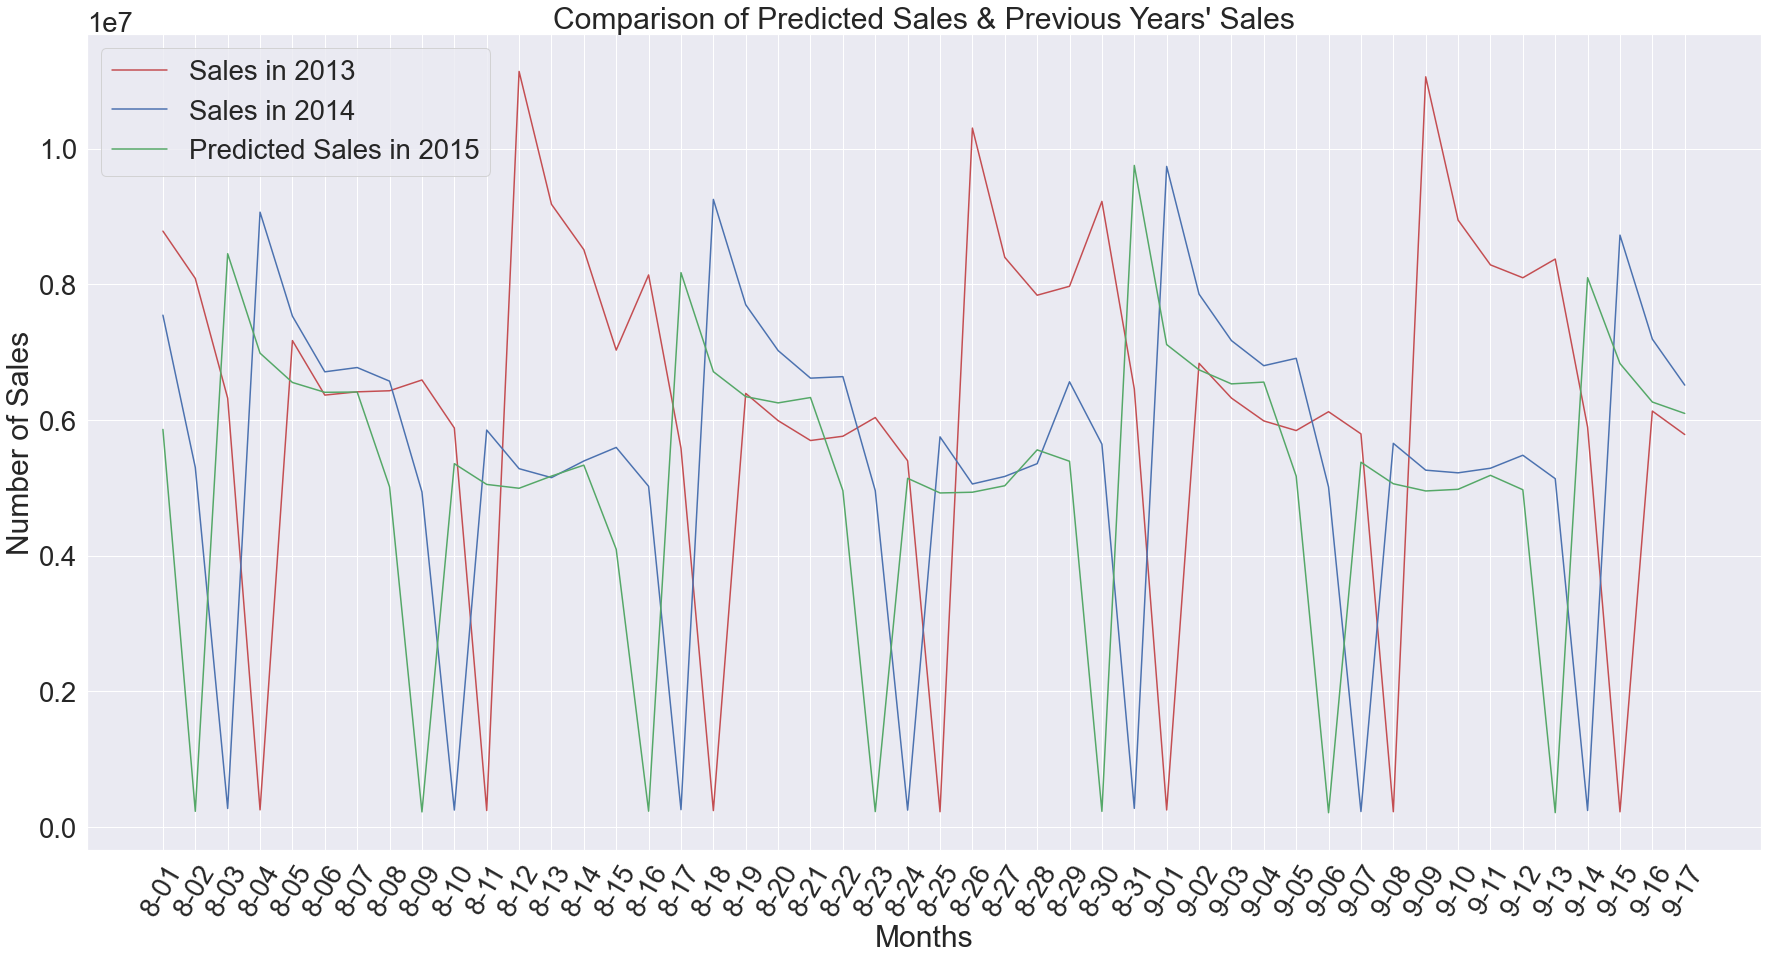

In [184]:
#Plot for the comparison of sales
sns.set(rc = {'figure.figsize':(30,15)}, font_scale = 2.5)
sns.lineplot(data=compare, x="Month-Day", y="2013", color='r', label='Sales in 2013').set(title="Comparison of Predicted Sales & Previous Years' Sales")
sns.lineplot(data=compare, x="Month-Day", y="2014", color='b', label='Sales in 2014')
sns.lineplot(data=compare, x="Month-Day", y="2015", color='g', label='Predicted Sales in 2015')
plt.xticks(rotation=60)
plt.xlabel("Months")
plt.ylabel("Number of Sales")
plt.show()

The above graph shows the comparison of the predicted sales values in the year 2015 and sales numbers in the years 2013 & 2014. The predicted sales values were very similar to the previous years’ sales values that means if there would have been data about the actual sales values from the ‘test.csv’ dataset, it would have been very close.